In [1]:
from dotenv import load_dotenv
import os       
load_dotenv()

True

In [2]:
PROJECT_ID = os.getenv('PROJECT_ID')
LOCATION = "us-central1"

import vertexai

vertexai.init(project=PROJECT_ID,location=LOCATION)

### I - Multimodal Prompting and Parameter Control

#### A - Text

In [3]:
from vertexai.preview.generative_models import GenerativeModel
from vertexai.generative_models import (
    GenerationConfig,
    Image,
    Part
)

model = GenerativeModel("gemini-1.0-pro-002")   

In [4]:
from utils import gemini

In [5]:
response = gemini("What is a multimodal model?", model=model)
print(response)

A multimodal model is a type of artificial intelligence (AI) that can process and understand information from multiple modalities, such as text, images, and audio. This allows them to perform tasks that are beyond the capabilities of traditional AI models, which are typically limited to a single modality. 

There are two main types of multimodal models:

* **Early fusion models:** These models combine the input from different modalities into a single representation before processing it.
* **Late fusion models:** These models process the input from different modalities separately and then combine the results at a later stage.

Multimodal models are being used in a variety of applications, including:

* **Computer vision:** Multimodal models can be used to improve the accuracy of tasks such as object recognition and image segmentation.
* **Natural language processing:** Multimodal models can be used to improve the accuracy of tasks such as machine translation and text summarization.
* **

#### B - Multimodality: Image + Text

In [6]:
multimodal_model = GenerativeModel("gemini-1.0-pro-vision-001")

In [7]:
image = Image.load_from_file("Images/andrew_power_tools.png")
prompt = "Please describe what is in this image?"

contents_image = [image, prompt]

-------Prompt--------


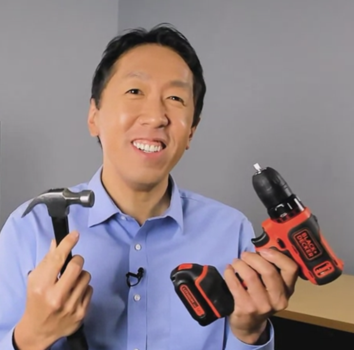

Please describe what is in this image?


In [8]:
from utils import print_multimodal_prompt

print("-------Prompt--------")
print_multimodal_prompt(contents_image)

In [9]:
from utils import gemini_vision

response = gemini_vision(contents_image, model=multimodal_model)
print(response)

 This is an image of a man holding a hammer in one hand and a power drill in the other. He is smiling and wearing a blue shirt. The background is a blurred out image of a room.


#### C - Multimodality: Video + Text

In [10]:
file_path = "dlai-sc-gemini-bucket/pixel8.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

import IPython

IPython.display.Video(video_url, width=450)

In [11]:
prompt = """
Answer the following questions using the video only:
 - What is the main person's profession?
 - What are the main features of the phone highlighted?
 - Which city was this recorded in?
"""

video = Part.from_uri(video_uri, mime_type="video/mp4")
contents_video = [prompt, video]

response = gemini_vision(contents_video, model=multimodal_model)
print(response)

 - The main person's profession is not mentioned in the video.
- The main features of the phone highlighted are the camera and the video recording capabilities.
- The video was recorded in Tokyo, Japan.


#### Gemini Model Parameters

-------Prompt--------


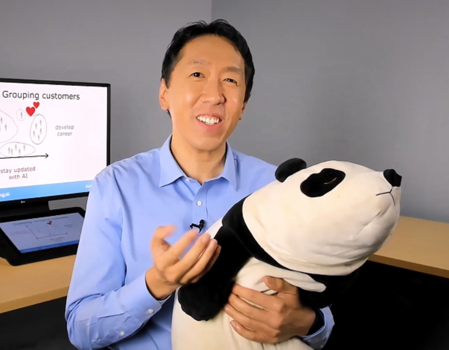

Write what is happening in the following image
from a unique perspective and do not mention names


In [12]:
image = Image.load_from_file("Images/panda.png")
prompt = """Write what is happening in the following image
from a unique perspective and do not mention names"""

contents = [image,prompt]

print("-------Prompt--------")
print_multimodal_prompt(contents)

In [13]:
response = gemini_vision(contents, model=multimodal_model)
print(response)

 A man is standing in front of a screen with a stuffed panda in his arms. He is smiling and looking at the camera. There is a slide on the screen that says "Grouping Customers". The man is wearing a blue shirt and black pants. He has short black hair and brown eyes. He is standing in an office. There is a window in the background.


##### 1 - Temperature, Top k

In [14]:
from utils import gemini_vision_parameters

generation_config = GenerationConfig(
    temperature=0.0,
    top_k=1,
)

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response)

 A man is standing in front of a screen with a stuffed animal in his arms. He is smiling and looking at the camera. There is a slide on the screen that says "Grouping Customers". The man is wearing a blue shirt and black pants. He has short black hair and brown eyes. He is standing in an office. There is a window in the background.


In [15]:
generation_config = GenerationConfig(
    temperature=1,
    top_k=40,
)

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response)

 A man is standing in front of a screen with a stuffed animal in his arms. He is smiling and looking at the camera. There is a slide show presentation projected on a screen behind him.


##### 2 - Top p

In [16]:
generation_config = GenerationConfig(
    temperature=1,
    top_k=40,
    top_p=0.01
)

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response)

 A man is standing in front of a screen with a stuffed animal in his arms. He is smiling and looking at the camera. There is a slide on the screen that says "Grouping Customers". The man is wearing a blue shirt and black pants. He has short black hair and brown eyes. He is standing in an office. There is a window in the background.


##### 3 - Max Output Tokens

In [19]:
generation_config = GenerationConfig(
    max_output_tokens=10
)

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response)

 A man is standing in front of a whiteboard


##### 3 - Stop Sequences

In [20]:
generation_config = GenerationConfig(
    stop_sequences=["panda"]
)

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response)

 A man is standing in front of a whiteboard giving a presentation about customer grouping. He is holding a stuffed 


### II - Creating Use Cases with Images

##### 1 - Let's make a Fruit Salad!

-------images--------

I want to make a fruit salad with three bananas, two apples, one kiwi, and one orange. This is an image of my bowl of fruits:



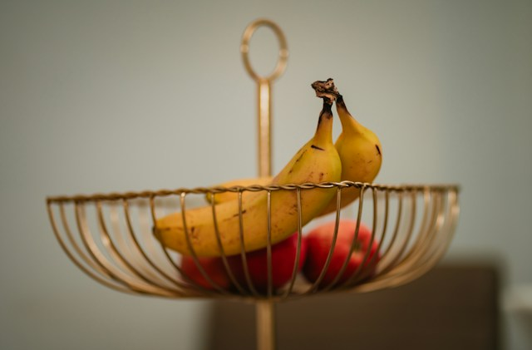

This is the price list for fruits at my supermarket:


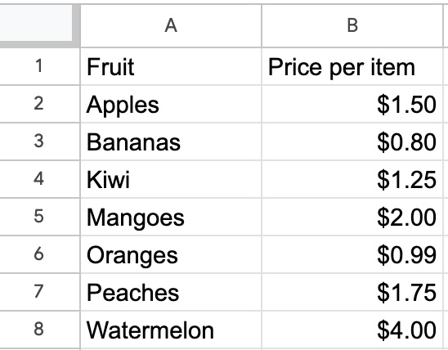


Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on the image?
- Given the fruits in my bowl on the image and the fruit salad recipe, what am I missing?
- Given the fruits I still need to buy, what would be the prices and total cost for these fruits?



In [21]:
fruit = Image.load_from_file("Images/bowl-fruits.jpg")
prices = Image.load_from_file("Images/price-list-fruits.jpg")

instruction_1 = """
I want to make a fruit salad with three bananas, two apples, \
one kiwi, and one orange. This is an image of my bowl \
of fruits:
"""

instruction_2 = "This is the price list for fruits at \
my supermarket:"

question = """
Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on \
the image?
- Given the fruits in my bowl on the image and the fruit salad \
recipe, what am I missing?
- Given the fruits I still need to buy, what \
would be the prices and total cost for these fruits?
"""

contents = [
    instruction_1,
    fruit,
    instruction_2,
    prices,
    question,
]

print("-------images--------")
print_multimodal_prompt(contents)


In [22]:
response = gemini_vision(
            contents,
            multimodal_model)

print(response)

 You have 2 bananas and 2 apples in your fruit bowl.

To make the fruit salad, you need 3 bananas, 2 apples, 1 kiwi, and 1 orange.

So, you are missing 1 banana, 1 kiwi, and 1 orange.

The prices for these fruits are $0.80, $1.25, and $0.99, respectively.

So, the total cost for these fruits would be $3.04.


##### 2 - Your very own Interior Designer!

In [23]:
furniture_images_uri = [
    "Images/chair-1.jpg",
    "Images/chair-2.jpg",
    "Images/chair-3.jpg",
    "Images/chair-4.jpg",
]

furniture_images = [Image.load_from_file(uri)
                    for uri in furniture_images_uri]

room_image = Image.load_from_file("Images/room.jpg")

-------Prompt--------
You are an interior designer.
Consider the following chairs:
chair 1:


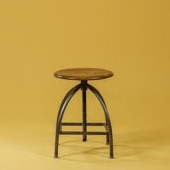

chair 2:


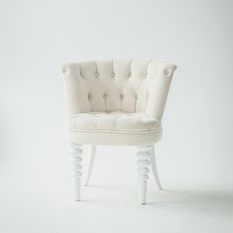

chair 3:


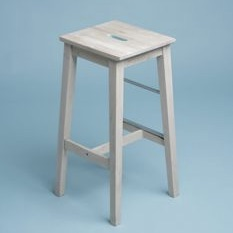

chair 4:


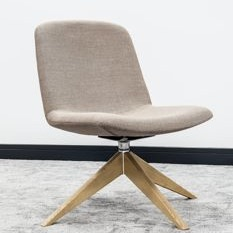

room:


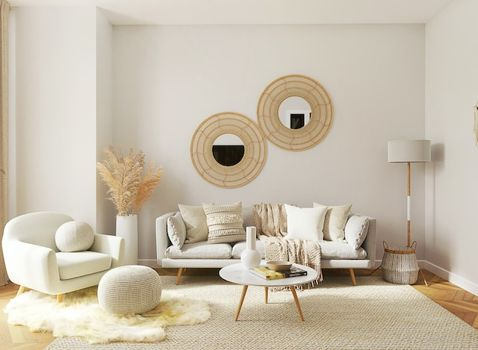

For each chair, explain whether it would be appropriate for the style of the room:


In [25]:
recommendation_content = [
    "You are an interior designer.",
    "Consider the following chairs:",
    "chair 1:",
    furniture_images[0],
    "chair 2:",
    furniture_images[1],
    "chair 3:",
    furniture_images[2],
    "chair 4:",
    furniture_images[3],
    "room:",
    room_image,
    "For each chair, \
explain whether it would be appropriate for the \
style of the room:",
]

print("-------Prompt--------")
print_multimodal_prompt(recommendation_content)

In [26]:
multimodal_model = GenerativeModel("gemini-1.5-pro-001")

response = gemini_vision(
            recommendation_content,
            multimodal_model)

print(response)

Here's a breakdown of each chair's suitability for the room:

**Chair 1: Industrial Stool** ❌

* **Style Clash:** This chair's industrial, utilitarian aesthetic clashes with the room's soft, organic, and slightly bohemian vibe. 
* **Material Mismatch:** The metal and wood combination, while common in industrial design, doesn't complement the existing natural materials (rattan, wool, linen) used in the room.

**Chair 2: White Tufted Armchair**  ❌

* **Too Formal:** While elegant, this chair feels too traditional and formal for the relaxed, casual atmosphere of the room. 
* **Color Disruption:** The stark white upholstery disrupts the neutral, warm color palette established in the room.

**Chair 3: Tall Wooden Bar Stool**  ❌

* **Function Over Form:**  Bar stools are designed for high counters or bars. This chair wouldn't make sense in a living room setting and would disrupt the flow of seating around the coffee table.

**Chair 4: Modern Swivel Chair** ✅

* **Complementary Style:** The c

##### 3 - Need to request Business Expense Reimbursement?

In [27]:
receipt_images_uri = [
    'Images/breakfast.jpg',
    'Images/lunch.jpg',
    'Images/diner.jpg',
    'Images/meal-others.jpg',
]

receipt_images = [Image.load_from_file(uri)
                  for uri in receipt_images_uri]

with open("Images/travel-policy.txt", "r") as file:
    policy = file.read()

In [28]:
INSTRUCTION = "Never make up facts, and if you are not 100% sure, \
be transparent in stating when you are not sure, or do not \
have enough information to answer certain questions or \
fulfill certain requests."

ROLE = "You are an HR professional and an expert in travel expenses."

ASSIGNMENT = """
You are reviewing travel expenses for a business trip.
Please complete the following tasks:
1. Itemize everything on the receipts, including tax and \
total.  This means identifying the cost of individual \
items that add up to the total cost before tax, as well \
as the tax ,such as sales tax, as well as tip.
2. What is the total sales tax paid?  In some cases, \
the total sales tax may be a sum of more than one line \
item of the receipt.
3. For this particular receipt, the employee who is \
adding this business expense purchased the meal with \
a group. The employee only ordered the KFC Bowl. Please \
provide the cost of the employee's order only.  Include \
both the cost before tax, and also estimate the tax \
that is applied to this employee's order.  To do this,\
calculate the fraction of the employee's pre-tax order\
divided by the total pre-tax cost.  This fraction can be \
applied to the total sales tax that you calculated earlier.
4.  Please calculate the amount spent by others, which \
are all the other line items on the receipt.  Please \
provide this sum before tax, and if possible, apply the \
tax for the total cost.
5. Check the expenses against company policy and flag \
if there are issues.
"""

receipt_content = [
    INSTRUCTION,
    ROLE,
    "Answer the questions based on the following receipts:"
    "breakfast:",
    receipt_images[0],
    "lunch:",
    receipt_images[1],
    "diner",
    receipt_images[2],
    "meal-others",
    receipt_images[3],
    ASSIGNMENT,
    policy,
]

In [29]:
response = gemini_vision(
            receipt_content,
            multimodal_model)

print(response)

## Itemized Receipts and Analysis:

**1. Itemization:**

* **Breakfast:**
    * 1 Keen Greens Smoothie: $9.95
    * 1 Banana: $1.35
    * Subtotal: $11.30
    * Sales Tax: $0.96
    * Total: $12.26
* **Lunch:**
    * 1 MINI BURGER: $7.00
    * SF Mandate (4.00%): $0.31 
    * Cheddar: $0.75
    * Subtotal: $8.06
    * Tax: $0.70
    * Tip: $1.40
    * Total: $10.16
* **Dinner (Akikos Sushi Bar):** 
    * Unable to itemize.  The receipt is too blurry to decipher individual items.
* **Dinner (Illuminarium Lumin Cafe):**
    * KFC Bowl: $17.00
    * Cheeseburger Sliders: $16.00
    * TACOS: $15.00
    * Coke Bottle: $6.50
    * Subtotal: $54.50
    * Tax: $4.56
    * Tip: $10.90
    * Total: $69.96

**2. Total Sales Tax:**  $0.96 + $0.70 + $4.56 = **$6.22**

**3. Employee's Meal Cost (Illuminarium Lumin Cafe - KFC Bowl):**

* Cost before tax: $17.00
* Estimated tax:  ($17.00 / $54.50) * $4.56 = **$1.42** 

**4.  Cost of Others' Meals (Illuminarium Lumin Cafe):**

* Total before tax: $54.5

### III - Developing Use Cases with Videos

In [30]:
multimodal_model = GenerativeModel("gemini-1.5-flash-001")

#### 1 - Digital Marketer

In [31]:
file_path = "dlai-sc-gemini-bucket/vertex-ai-langchain.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

IPython.display.Video(video_url, width=450)


In [32]:
video = Part.from_uri(video_uri, mime_type="video/mp4")

role = """
You are a great digital marketer working on a new video.
"""

tasks = """
You will add the video to your website and to do this you
need to complete some tasks. Please make sure your answer
is structured.

Tasks:
- What is the title of the video?
- Write a summary of what is in the video.
- Generate metadata for the video in JSON that includes:\
Title, short description, language, and company.
"""

contents = [video, role, tasks]

In [33]:
generation_config = GenerationConfig(
    temperature=0.1,
)

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response)

Here are the tasks you requested:

- **Title of the video:** Build AI-powered apps on Vertex AI with LangChain
- **Summary of the video:** This video explains how to use Vertex AI and LangChain to build AI-powered applications. The video covers common design patterns, how to implement these patterns, and use cases for Vertex AI and LangChain.
- **Metadata for the video in JSON:**
```json
{
  "Title": "Build AI-powered apps on Vertex AI with LangChain",
  "short description": "Learn how to use Vertex AI and LangChain to build AI-powered applications. This video covers common design patterns, how to implement these patterns, and use cases for Vertex AI and LangChain.",
  "language": "English",
  "company": "Google Cloud"
}
``` 



#### 2 - Explaining the Educational Concepts

In [34]:
file_path = "dlai-sc-gemini-bucket/descending-into-ml.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

IPython.display.Video(video_url, width=450)

In [35]:
video = Part.from_uri(video_uri, mime_type="video/mp4")

prompt = """
Please have a look at the video and answer the following
questions.

Questions:
- Question 1: Which concept is explained in the video?
- Question 2: Based on your answer to Question 1,
can you explain the basic math of this concept?
- Question 3: Can you provide a simple scikit code example
explaining the concept?
"""

contents = [video, prompt]

multimodal_model = GenerativeModel("gemini-1.5-pro-001")

response = gemini_vision(contents,
                        multimodal_model)

print(response)

Certainly, let's break down the video content.

**Question 1: Which concept is explained in the video?**

The video explains the fundamental concept of **linear regression** in the context of machine learning.

**Question 2: Based on your answer to Question 1, can you explain the basic math of this concept?**

Linear regression aims to find the best-fitting straight line (in simple cases) or hyperplane (in higher dimensions) that represents the relationship between input features (X) and a target variable (Y).

The equation of the line is represented as:

**Y = wX + b**

where:

* **Y** is the predicted target variable (dependent variable)
* **X** is the input feature (independent variable)
* **w** is the weight vector (slope of the line)
* **b** is the bias term (y-intercept)

The goal is to determine the optimal values of **w** and **b** that minimize the difference between the predicted values (Y) and the actual values (true labels) in the training dataset. This difference is quanti

#### 3 - Extracting Information

In [36]:
file_path = "dlai-sc-gemini-bucket/google-search.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

IPython.display.Video(video_url, width=450)

In [37]:
video = Part.from_uri(video_uri, mime_type="video/mp4")

questions = """
Answer the following questions using the video only.

Questions:
- What is the most searched sport?
- Who is the most searched scientist?
"""

format_html = """
Format:
Present the results in a table with a row for each question
and its answer.
Make sure the table is in markdown format.
"""

contents = [video, questions, format_html]

In [38]:
generation_config = GenerationConfig(
    temperature=0.9,
)

multimodal_model = GenerativeModel("gemini-1.5-flash-001")

response = gemini_vision_parameters(
                        contents,
                        multimodal_model,
                        generation_config)

print(response) 

| Question | Answer |
|---|---|
| What is the most searched sport? | Soccer |
| Who is the most searched scientist? | Albert Einstein | 



#### 4 - Finding a Needle in a Haystack

In [39]:
video_1 = Part.from_uri("gs://dlai-sc-gemini-bucket/sc-gc-c3-LLMOps_L1_v3.mp4.mp4",  mime_type="video/mp4")
video_2 = Part.from_uri("gs://dlai-sc-gemini-bucket/sc-gc-c3-LLMOps_L2_v4.mp4",  mime_type="video/mp4")
video_3 = Part.from_uri("gs://dlai-sc-gemini-bucket/sc-gc-c3-LLMOps_L3_v4.mp4",  mime_type="video/mp4")

role = """
You are specialized in analyzing videos and finding \
a needle in a haystack.
"""

instruction = """
Here are three videos. Each is a lesson from the \
LLMOps course from Deep Learning AI.
Your answers are only based on the videos.
"""

questions = """
Answer the following questions:
1. Create a summary of each video and what is discussed in \
the video.\
Limit the summary to a max of 100 words.
2. In which of the three videos does the instructor run \
and explains this Python code: bq_client.query(). \
Where do you see this code in the video?
"""

contents = [
    role,
    instruction,
    video_1,
    video_2,
    video_3,
    questions
]

In [40]:
multimodal_model = GenerativeModel("gemini-1.5-pro-001")

response = gemini_vision(contents,
                        multimodal_model)

print(response) 

Here are the summaries of each video:

**Video 1: LLMops The Fundamentals** 
This lesson introduces the concepts and ideas of LLMops, a set of practices to manage the full Machine Learning lifecycle, and how it compares to MLOps.  It discusses how machine learning operations help in unifying ML development and operation by automating and monitoring steps such as integration, testing, releasing, deployment, and infrastructure management. The instructor explains how LLMops focuses on the LLM development and managing the model in production while LLM system design looks at the broader picture of the entire end-to-end application. 

**Video 2:  LLMops Data Preparation**
This lesson covers how to deal with text data and how to retrieve this data from a Data Warehouse, specifically BigQuery. The instructor illustrates how to connect and authenticate to the service and how to explore and retrieve the relevant Stack Overflow text data. Additionally, the lesson highlights how to deal with large

#### IV - Integrating Real-Time Data with Function Calling

##### Asking for Real-Time Information from LLMs : Function Calling with LLMs

In [41]:
from vertexai.generative_models import (
    Content,
    FunctionDeclaration,
    GenerativeModel,
    Part,
    Tool,
)

In [42]:
get_exchange_rate_func = FunctionDeclaration(
    name="get_exchange_rate",
    description="Get the exchange rate for currencies "
                "between countries",
    parameters={
        "type": "object",
        "properties": {
            "currency_date": {
                "type": "string",
                "description": "A date that must always be in "
                               "YYYY-MM-DD format or the value "
                               "'latest' if a time period is not "
                               "specified"
            },
            "currency_from": {
                "type": "string",
                "description": "The currency to convert from "
                               "in ISO 4217 format"
            },
            "currency_to": {
                "type": "string",
                "description": "The currency to convert to "
                               "in ISO 4217 format"
            }
        },
        "required": [
            "currency_from",
            "currency_date",
            "currency_to"
        ]
    }
)

exchange_rate_tool = Tool(
    function_declarations=[get_exchange_rate_func],
)

In [43]:
model = GenerativeModel("gemini-1.5-flash-001")

prompt = """What is the exchange rate from Australian dollars to
Swedish krona? How much is 500 Australian dollars worth in
Swedish krona?"""

response = model.generate_content(
    [
    Content(role="user", parts=[
        Part.from_text(prompt),
    ]),
    Content(role="function", parts=[
        Part.from_dict({
            "function_call": {
                "name": "get_exchange_rate",
            }
        })
    ])]
    , tools=[exchange_rate_tool]
)

In [44]:
response.candidates[0].content

role: "model"
parts {
  function_call {
    name: "get_exchange_rate"
    args {
      fields {
        key: "currency_to"
        value {
          string_value: "SEK"
        }
      }
      fields {
        key: "currency_from"
        value {
          string_value: "AUD"
        }
      }
      fields {
        key: "currency_date"
        value {
          string_value: "latest"
        }
      }
    }
  }
}

In [45]:
params = {}
for key, value in response.candidates[0].content.parts[0]\
                          .function_call.args.items():
    params[key[9:]] = value
params

{'from': 'AUD', 'date': 'latest', 'to': 'SEK'}

In [46]:
import requests

url = f"https://api.frankfurter.app/{params['date']}"

api_response = requests.get(url, params=params)

api_response.text

'{"amount":1.0,"base":"AUD","date":"2024-11-22","rates":{"SEK":7.2125}}'

In [47]:
response = model.generate_content(
    [
    Content(role="user", parts=[
        Part.from_text(prompt),
    ]),
    Content(role="function", parts=[
        Part.from_dict({
            "function_call": {
                "name": "get_exchange_rate",
            }
        })
    ]),
    Content(role="function", parts=[
        Part.from_function_response(
            name="get_exchange_rate",
            response={
                "content": api_response.text,
            }
        )
    ])]
    ,tools=[exchange_rate_tool],
)

In [48]:
response.candidates[0].content.parts[0].text

'The exchange rate from Australian dollars to Swedish krona is 7.2125 SEK per AUD. 500 Australian dollars is worth 3606.25 Swedish krona. \n'